<a href="https://colab.research.google.com/github/Syed-Irfan-1165/Google-Playstore-EDA/blob/master/Yes_Bank_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Summary

##Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.


## <b>Data Description </b>


1.   Date - Date of record
2.   Open - Opening Price
3.   High - Highest price in the day
4.   Low - Lowest price in the day
5.   Close - Occupations of the speaker

# **Data Preparation**

## **Importing and Inspecting Dataset**

In [55]:
#Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
# Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# Importing csv file

YesBank_df = pd.read_csv(r"/content/drive/MyDrive/Linear Regression/data_YesBank_StockPrices.csv")


In [58]:
YesBank_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [59]:
YesBank_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [60]:
YesBank_df.shape

(185, 5)

In [61]:
YesBank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [62]:
YesBank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [67]:
YesBank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


# **Exploratory Data Analysis**

## **Handling Outliers**

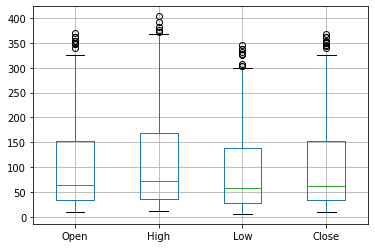

In [86]:
YesBank_df.boxplot()



##**Cleaning and Manipulating dataset**

In [ ]:
YesBank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Text(0.5, 15.0, 'Variables')

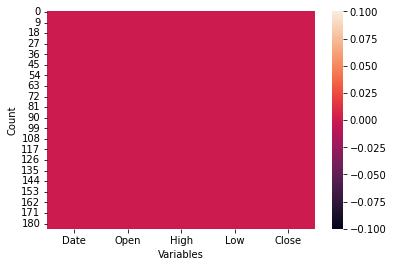

In [ ]:
#plotting the heatmap for checking the null values
data = YesBank_df.isnull()
heat_map = sns.heatmap(data)
plt.ylabel('Count')
plt.xlabel('Variables')

In [ ]:
duplicate = YesBank_df[YesBank_df.duplicated()]
print("Duplicate Values :")

Duplicate Values :


In [ ]:
#Writing a define function to obtain variable, dtypes,count,unique,duplicate,missing values in a single dataframe
def show_missing(df):
   
    
    variables = []
    dtypes = []
    count = []
    unique = []
    duplicate = []
    missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        duplicate.append(df.duplicated().sum())
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'duplicate' : duplicate,
        'missing': missing, 
        
    })    
        
    return output

In [ ]:
show_missing(YesBank_df).T

,0,1,2,3,4
variable,Date,Open,High,Low,Close
dtype,object,float64,float64,float64,float64
count,185,185,185,185,185
unique,185,183,184,183,185
duplicate,0,0,0,0,0
missing,0,0,0,0,0


In [ ]:
#Creating date format and new month column

from datetime import datetime
from datetime import time


YesBank_df['date_new']=YesBank_df['Date'].apply(lambda x : datetime.strptime(x,'%b-%y'))
YesBank_df["month"]=YesBank_df["date_new"].apply(lambda x : datetime.strftime(x, '%B'))
YesBank_df["year"]=YesBank_df["date_new"].apply(lambda x : datetime.strftime(x, '%Y'))

In [ ]:
YesBank_df.head()

,Date,Open,High,Low,Close,date_new,month,year
0,Jul-05,13.00,14.00,11.25,12.46,2005-07-01,July,2005
1,Aug-05,12.58,14.88,12.55,13.42,2005-08-01,August,2005
2,Sep-05,13.48,14.87,12.27,13.30,2005-09-01,September,2005
3,Oct-05,13.20,14.47,12.40,12.99,2005-10-01,October,2005
4,Nov-05,13.35,13.88,12.88,13.41,2005-11-01,November,2005


##**Univariate Analysis**

##**Bivariate Analysis**

##**Multivariate Analysis**



##**Removing Multicolinearity**



#**Model building**

##**Conclusion**